# Sociograms, Density, and Network Connectivity

In this part, you'll learn how to analyze the connectivity of a network based on measures of distance, reachability, and transactivity. 

## Readings

- Scott, J. (2017). Social network analysis (4th edition) (Ch. 5). SAGE Publications.
- Carolan, B. V. (2014). Social network analysis and education: Theory, methods & applications (Ch. 5). SAGE Publications.
- Ergün, E., & Usluel, Y. K. (2016). An analysis of density and degree-centrality according to the social networking structure formed in an online learning environment. Educational Technology & Society, 19(4), 34–46. http://www.ifets.info/journals/19_4/4.pdf


## Krackhardt Kite Social Network

For this unit, let's consider a 10 actor social network introduced by David Krackhardt (1990). 

> Krackhardt, David. “Assessing the Political Landscape: Structure, Cognition, and Power in Organizations”. Administrative Science Quarterly. 35 (2): 342–369. doi:10.2307/2393394. JSTOR 2393394. June 1990.

The Kite network can be directly loaded from `NetworkX`. Let's create the network and plot it:

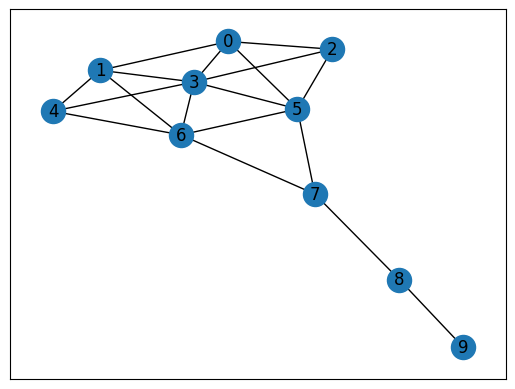

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.krackhardt_kite_graph()
nx.draw_networkx(g)

## Use other Python libraries to plot graphs

### plotly

`plotly` is a powerful library for generating interactive visualizations. 

In [29]:
# pip install plotly # if you haven't installed plotly yet

import plotly.graph_objects as go

# Generate positions for the nodes using the spring layout algorithm
pos = nx.spring_layout(g)
# pos = nx.circular_layout(g)

# Update node positions in the graph
for node in g.nodes():
    g.nodes[node]['pos'] = pos[node]

# Create edge traces
edge_x = []
edge_y = []
for edge in g.edges():
    x0, y0 = g.nodes[edge[0]]['pos']
    x1, y1 = g.nodes[edge[1]]['pos']
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Create node traces
node_x = []
node_y = []
for node in g.nodes():
    x, y = g.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(showscale=False, colorscale='YlGnBu', size=10, line_width=2))

# Create figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Karate Club Graph (Interactive)',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    dragmode='lasso',  # Enable node dragging
                ))

# Show figure
fig.show()

### pyvis

`pyvis` is another great option. 

In [30]:
# pip install pyvis

from pyvis.network import Network

# Create a NetworkX graph (you can use any existing graph)
G = nx.karate_club_graph()

# Convert the NetworkX graph to a Pyvis network
# net = Network(height='500px', width='100%', directed=True, notebook=True, cdn_resources='in_line')
net = Network(height='500px', width='100%', directed=True)
net.from_nx(G)

# Save the network as an HTML file
net.show('network.html', notebook=False)

network.html


Open `network.html` file locally to see the result. 

## Distance

How “far” is node A from node B?

Are nodes far away or close to each other in this network? Which nodes are “closest” and “farthest” to other nodes?

We need a sense of distance between nodes to answer these questions.

### Paths

**Path**: A sequence of nodes, with each neighboring pair connected by an edge. 

What paths connect node 3 to node 7 in the Kite network? There are many:

- 3 -- 5 -- 7
- 3 -- 6 -- 7
- 3 -- 0 -- 5 -- 7
- 3 -- 0 -- 2 -- 5 -- 7
- ...

**Path length**: Number of steps it contains from beginning to end.

These paths are of different lengths.

- 3 -- 5 -- 7: **2 hops**
- 3 -- 6 -- 7: **2 hops**
- 3 -- 0 -- 5 -- 7: **3 hops**
- 3 -- 0 -- 2 -- 5 -- 7: **4 hops**

**Distance** between two nodes: the length of the shortest path between them.

The distance between node 3 and 7 is 2.

You can identify the shortest path(s) and calculate distance using `NetworkX`:

In [31]:
nx.shortest_path(g, 3, 7)

[3, 5, 7]

In [32]:
nx.shortest_path_length(g, 3, 7)

2

You can also find out the distances between one node with all the other nodes:

In [33]:
nx.shortest_path_length(g, 3)

{3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 1, 6: 1, 7: 2, 8: 3, 9: 4}

## Distance Measures

With these measures, we can calculate distance measures to characterize the network. For example: 

How to characterize the distance between all pairs of nodes in a graph?

**Average distance** between every pair of nodes.

In [34]:
nx.average_shortest_path_length(g)

1.9777777777777779

**Diameter**: maximum distance between any pair of nodes. 

In [35]:
nx.diameter(g)

4

The **Eccentricity** of a node n is the largest distance between n and all other nodes.

In [36]:
nx.eccentricity(g)

{0: 4, 1: 4, 2: 4, 3: 4, 4: 4, 5: 3, 6: 3, 7: 2, 8: 3, 9: 4}

The **radius** of a graph is the minimum eccentricity. 

In [37]:
nx.radius(g)

2

The **Periphery** of a graph is the set of nodes that have eccentricity equal to the diameter.

In [38]:
nx.periphery(g)

[0, 1, 2, 3, 4, 9]

The **center** of a graph is the set of nodes that have eccentricity equal to the radius.

In [39]:
nx.center(g)

[7]

### Examples of using these distance measures

How many people does an idea need to go through to get between people?

How many possible paths are there for an idea to go between people?

Who to reach out first to spread an idea most efficiently?

## Density

**Density** is defined as proportion of possible edges that are actually present in graph. 

![](img/density.png)

In [40]:
g.number_of_edges() / (g.number_of_nodes() * (g.number_of_nodes() - 1)/2)


0.4

In [41]:
nx.density(g)

0.4

Density could be used to figure out how interactive a class is overall.


## Transitivity and Clustering

### Triadic closure

The tendency for people who share connections in a social network to become connected.

![](img/triads.png)

Using `NetworkX`, we can calculate the number of triangles each node is part of. 


<!-- **Global Clustering Coefficient** measures clustering on the whole network.  -->

**Transitivity**: Percentage of “open triads” that are triangles (i.e., close triads) in a network.

![](img/transivity.png)

Let's first look at the simplest example: a triangle (or a close triad).

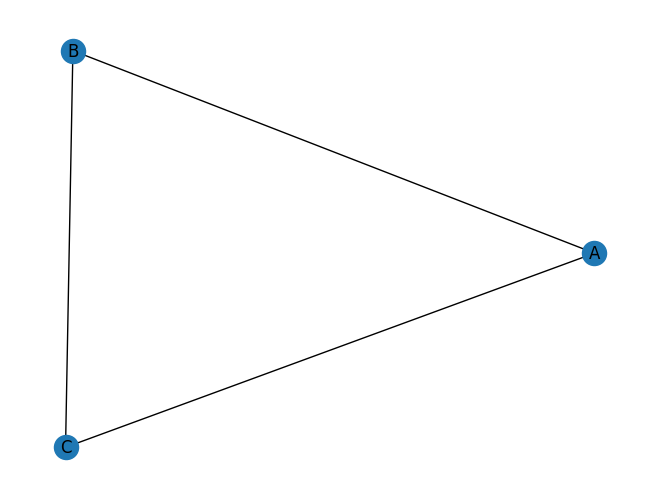

In [42]:
triangle = nx.Graph()
triangle.add_edges_from([("A", "B"), ("A", "C"), ("B", "C")])
nx.draw_spring(triangle, with_labels=True)

In [43]:
nx.transitivity(triangle) # 3 * 1 / 3 = 1

1.0

Now, let's add another node D and an edge C--D. 

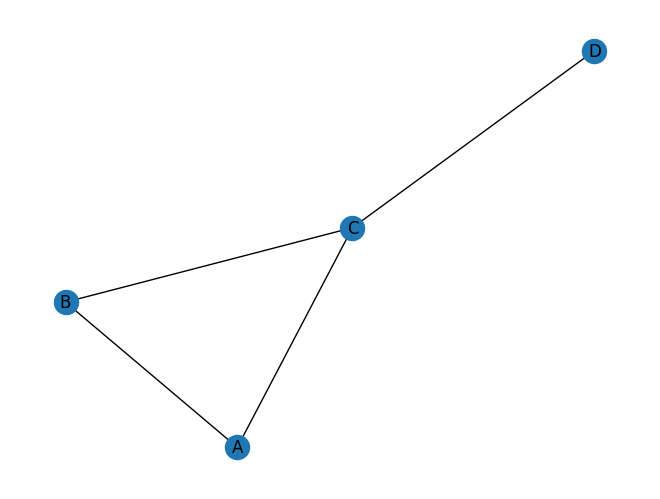

In [44]:
triangle.add_edge("C", "D")
nx.draw_spring(triangle, with_labels=True)

In [45]:
nx.transitivity(triangle) # 3 * 1 / 5 = 0.6

0.6

For the Kite network, the transitivity is:

In [46]:
nx.transitivity(g)

0.5789473684210527

In social networks, when we see actors as people, it indicates the likelihood of two person's friends becoming friends.

Transitivity in this case shows whether triadic closure is a network formation mechanism in a network.

## Reciprocity

**Reciprocity** captures the extent to which edges are reciprocating in the network. 

It only applies to a directed network because an edge need to have a direction to consider reciprocation. 

Let's create a simple directed network manually using the `DiGraph()` function.

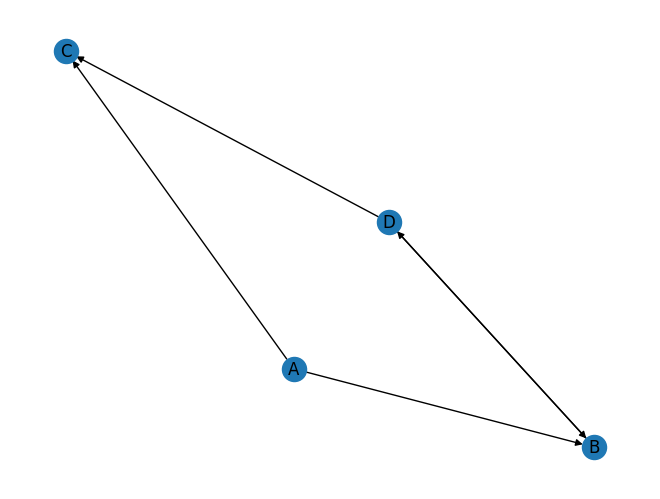

In [47]:
dg = nx.DiGraph()
dg.add_edges_from([('A', 'B'), ('A', 'C'), ('D', 'B'), ('B', 'D'), ('D', 'C')])

# nx.draw_networkx(dg)
nx.draw_spring(dg, with_labels=True)

This network has 5 edges, 2 of which are reciprocating each other. 

The overall reciprocity of the network can be computed using the `overall_reciprocity` function:

In [48]:
nx.overall_reciprocity(dg) # 2 / 5

0.4

If we add another edge B -> A, the overall reciprocity will increase. 

In [49]:
dg.add_edge('B', 'A')
nx.overall_reciprocity(dg) # 4 / 6

0.6666666666666666

In education, reciprocity could be used to gauge whether friendship or attention is mutual among students.

## Summary

Network measures introduced in this unit are about how "connected" a network is, with each measure one specific type of connectedness. 

For simplicity, we have mostly focused on undirected, unweighted, and static networks. More complex variations of each measure can be calculated when direction, weight, temporality are considered. 